<a href="https://colab.research.google.com/github/gupta4327/telecomChurnPredictionmodel/blob/main/Telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>



In [ ]:
#importing all necessary libraries and modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.preprocessing import StandardScaler
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting a google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading a csv file of dataset 
file_path = '/content/drive/MyDrive/Colab Notebooks/pandas/dat/Telco-Customer-Churn.csv'
dataset = pd.read_csv(file_path)

In [ ]:
#to visualize first 5 observations 
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


***Data Dictionary***

1.   *Gender - Its self explanatory whether the end user is male or female.*

2.   *Senior Citizen - Whether a end user is senior citizen or not.*
 
3.   *Partner - Whether a user is single or they have partner(Married/live-in)*

4.   *Dependents - If user has any dependents(yes or no)*

5. *Tenure - Time period/years for which is user is using the service*

6. *Phone Service - If user is also using phone services or only internet services*

7. *Multiple Lines - Whether the user has multple lines or not(Yes, No or No Phone Service)*

8. *Internet Service - Method/ Kind of internet service user is using(DSL, Fibre optic,No)*

9. *OnlineSecurity - Customer has opted fore online secutrity or not(Yes or No)*

10. *OnlineBackUp - Customer has choosen onlineback up or n ot(Yes or No)*

11. *DeviceProtection - Customer has device protection or not (Yes or No)*

12. *TechSupport - If customer has taken the help of Tech Support* 

13. *Streaming TV - If customer has opted for TV streaming option* 

14. *Streaming Movies - If customer has opted for movie streaming option*

15. *Contract - User has choosen a year or mponth to month or two tear contract.*

16. *Paperless billing - If a customer have paperless billing or not (yes or no)*

17. *Payment method - Payment method customer uses - electronic check, mailed check, bank transfer or credit card*

18. *Monthly Charges - Monthly charge that a user is paying* 

19. *Total charges - Total charge thst a customer has paid till now.*

20. *Churn - Whether the customer has chuirn or not*






In [ ]:
# basic information of features in dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# checking for null values 
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

*so there are no null values in our dataset. Time to look for duplicates*

In [ ]:
#finding no. of duplicate rows
len(dataset[dataset.duplicated()])

0

*No duplicate rows are there*

In [ ]:
# for checking descriptive stats info of data 
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


*# If we check dataset.head and dataset.info, feature totalcharges shoud be of float type in actual but its of object type so we will converting it into float type*

In [ ]:
#checking for spaces value in Totalcharges column 
dataset[dataset['TotalCharges'] == ' '].shape

(11, 21)

*# Replacing space values with np.nan*

In [ ]:
#replacing null values 
dataset['TotalCharges'].replace({' ': np.nan}, inplace = True)

In [ ]:
#verifying removal of spaces 
dataset[dataset['TotalCharges'] == ' '].shape

(0, 21)

*# so now we have dealt with space values. Now we'll convert the feature into float type*

In [ ]:
#converting into float type
dataset['TotalCharges'] = dataset['TotalCharges'].astype('float64')

In [ ]:
#percentage of null values in TotalCharges
print('percent of Null values in TotalCharges : ', (dataset['TotalCharges'].isnull().sum()/dataset.shape[0])*100)

percent of Null values in TotalCharges :  0.1561834445548772


*# As the percentage of null values is very minute just 0.15 percent so i'll go with dropping null values *

In [ ]:
#dropping null values
dataset.dropna(inplace= True)

*# Now we'll visualize the stats table once again *

In [ ]:
#descriptive stats info 
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
dataset.shape

(7032, 21)

*# Although Senior citizen is coming into numerical feature it is a categorical feature with values 0 and 1*

In [ ]:
# checking for unique values and their counts in senior citizen features
dataset['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

*# Now we are done with basic data cleaning process althouh techiques like outlier treatment hasn't done yet. We'look into it while moving forward. Now we will shift our focus to feature engineering and analysis*

# ***#Feature analysis and engineering***

In [ ]:
#checking for number of unique values in dependent variable(i.e. is churn)
dataset['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

*# So we are with 1869 customers that has been churned and 5163 customers that are still not churned*

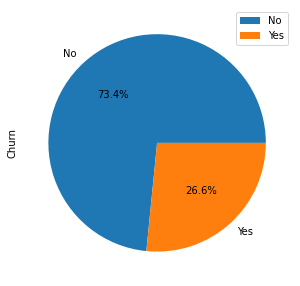

In [ ]:
fig = plt.figure(figsize=(5,5))
churn_counts = dataset['Churn'].value_counts()
churn_counts.plot.pie(labels = churn_counts.index.values, autopct='%1.1f%%')
plt.legend()

*# As Yes is 26.5 percent of total data it is not highly imbalanced class Thus, we can move forward*

# *Customer Identifier*

As customer idenifier is just an unique id of each customer. So it wont be any helpful in our model building so we doent need to perform any kind of analysis over it 

#*Gender*

In [ ]:
#checking for unique values and counts of feature
dataset['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

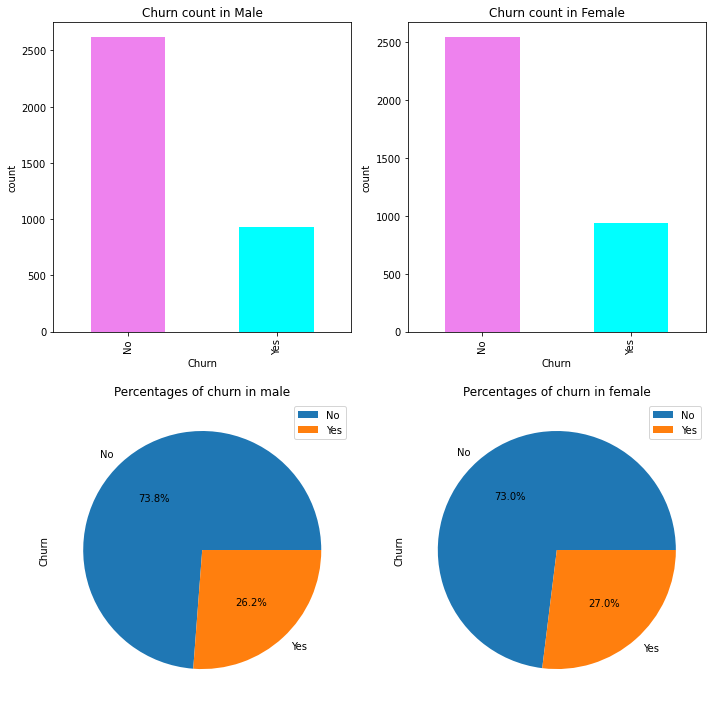

In [ ]:
 #checking if gender plays any significab=nt role in churning
counts_male = dataset[dataset['gender']=='Male']['Churn'].value_counts().sort_index() 
 #checking for churn rate in male and females
counts_female = dataset[dataset['gender']=='Female']['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(10,10))
#barplots
counts_male.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn count in Male')
ax[0,0].set(ylabel = 'count', xlabel='Churn')
counts_female.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn count in Female')
ax[0,1].set(ylabel = 'count', xlabel='Churn')
#pie plots
counts_male.plot.pie(ax = ax[1,0],labels=counts_male.index.values, autopct = '%1.1f%%')
ax[1,0].set_title('Percentages of churn in male')
ax[1,0].legend()
counts_female.plot.pie(ax = ax[1,1],labels=counts_female.index.values, autopct = '%1.1f%%')
ax[1,1].set_title('Percentages of churn in female')
ax[1,1].legend()
fig.tight_layout()

*# So here with the help of bar and pie we can visualize both percentage and counts of specifics(male and female) is same for churned or not churned. So we can conclude from this that gender doest impact our churn rate much* 

# *Senior Citizens*

In [ ]:
#checking for unique values and counts of feature
dataset['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

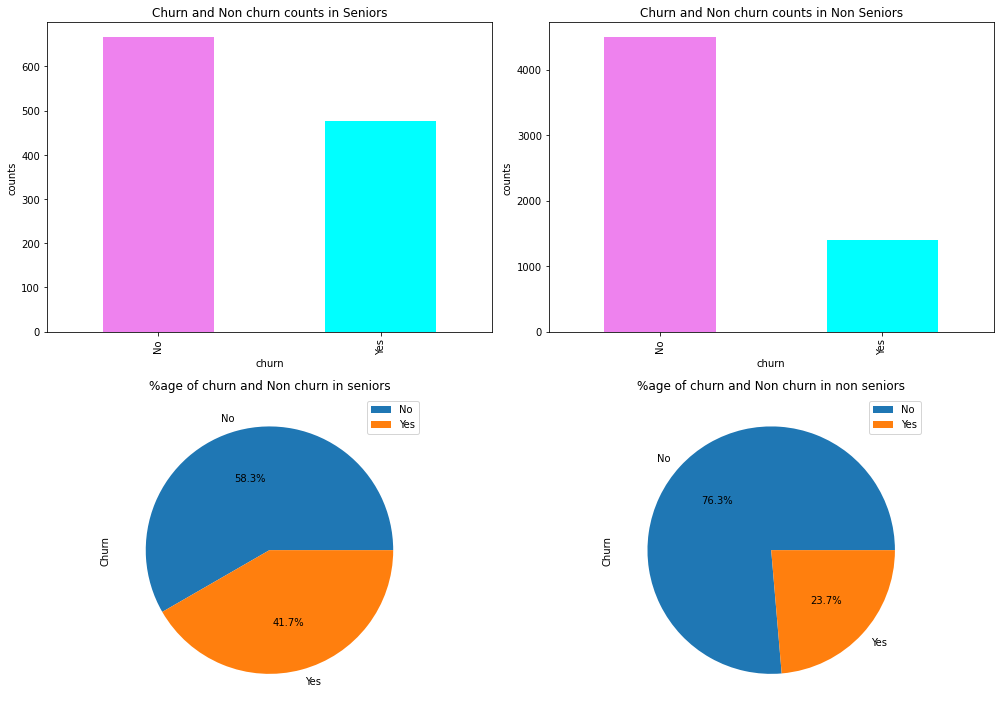

In [ ]:
 #checking if senior citizens have high churning rate
 #segregating senior citizen
counts_senior = dataset[dataset['SeniorCitizen']==1]['Churn'].value_counts().sort_index() 
#segregating non senior citizens
counts_nonsenior = dataset[dataset['SeniorCitizen']==0]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_senior.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts in Seniors')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_nonsenior.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts in Non Seniors')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_senior.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('%age of churn and Non churn in seniors')
counts_nonsenior.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('%age of churn and Non churn in non seniors')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*From the above visualisation we can say that on an average churning rate is higher in Senior Citizens*

# *Partner*

In [ ]:
#checking for unique values and counts of feature
dataset['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

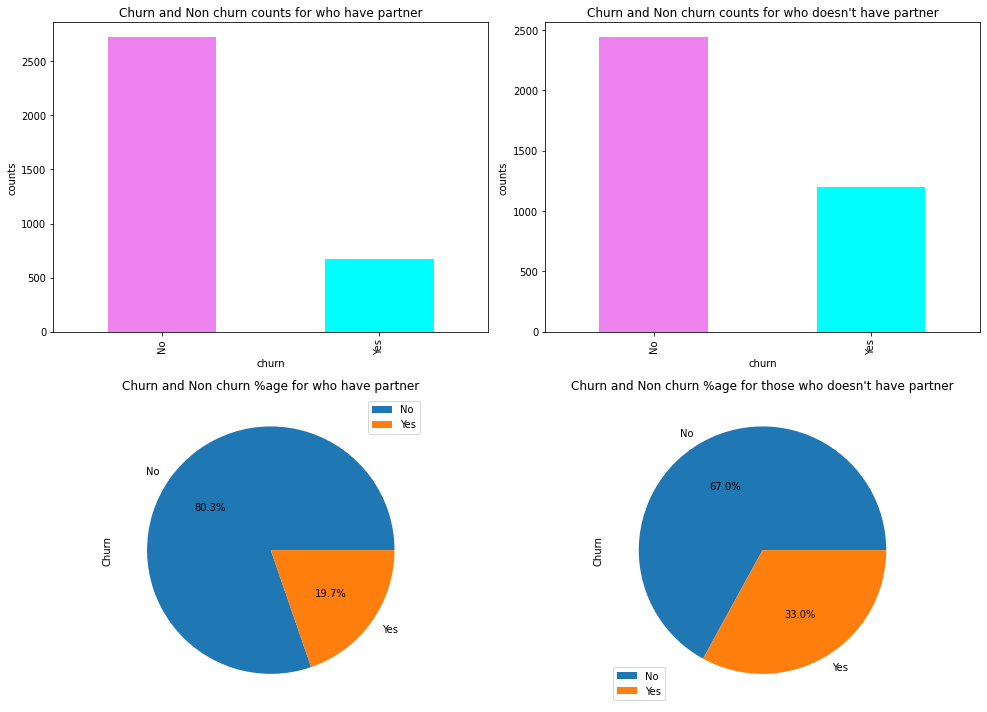

In [ ]:
 #checking if single churns the most or one having partner
#segregating customer with partners
counts_partner = dataset[dataset['Partner']=="Yes"]['Churn'].value_counts().sort_index() 
#segregating customer having no partners
counts_nopartner = dataset[dataset['Partner']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_partner.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for who have partner')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_nopartner.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for who doesn\'t have partner')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_partner.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for who have partner')
counts_nopartner.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for those who doesn\'t have partner')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*From the visualization and counts we can see that customers with partner plan have lower chances to churn as compare to those who doesn't opt for partner plans*

# *Dependents*

In [ ]:
#checking for unique values and counts for feature
dataset['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

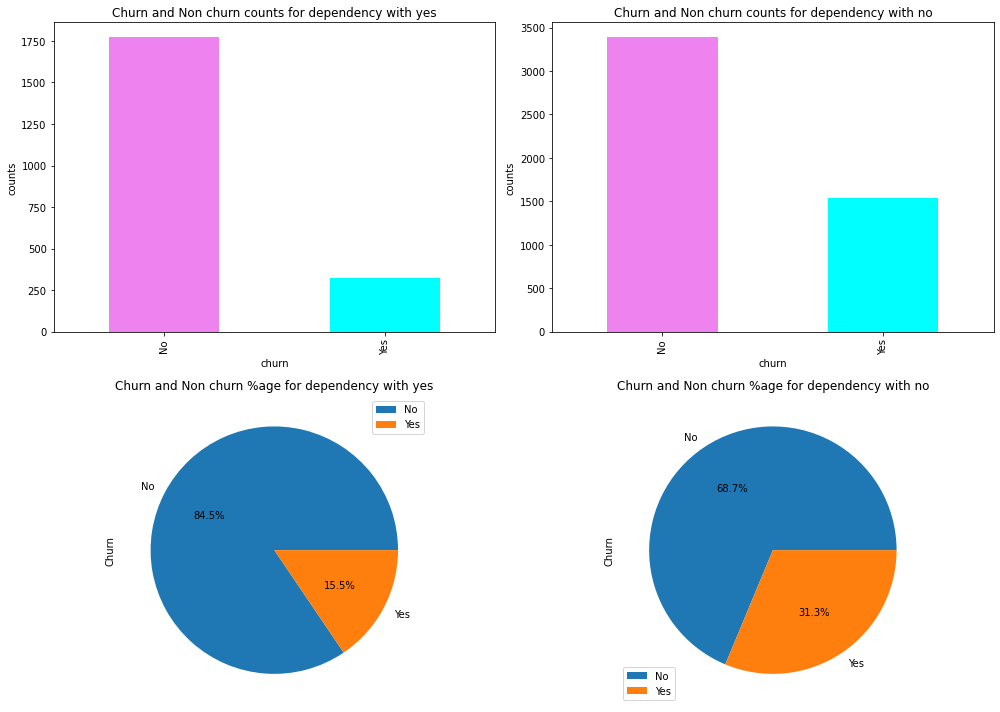

In [ ]:
 #checking if one with dependents usually churns or a one whith no dependents
#segregating customer that have dependents
counts_dependency = dataset[dataset['Dependents']=="Yes"]['Churn'].value_counts().sort_index() 
#segregating customer that doesn't have dependents 
counts_nondependency = dataset[dataset['Dependents']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_dependency.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for dependency with yes')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_nondependency.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for dependency with no')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_dependency.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for dependency with yes')
counts_nondependency.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for dependency with no')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*# Churn rate is higher in ones having dependent value as no*

# *Phone Services*

In [ ]:
#checking for unique values and counts for feature
dataset['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

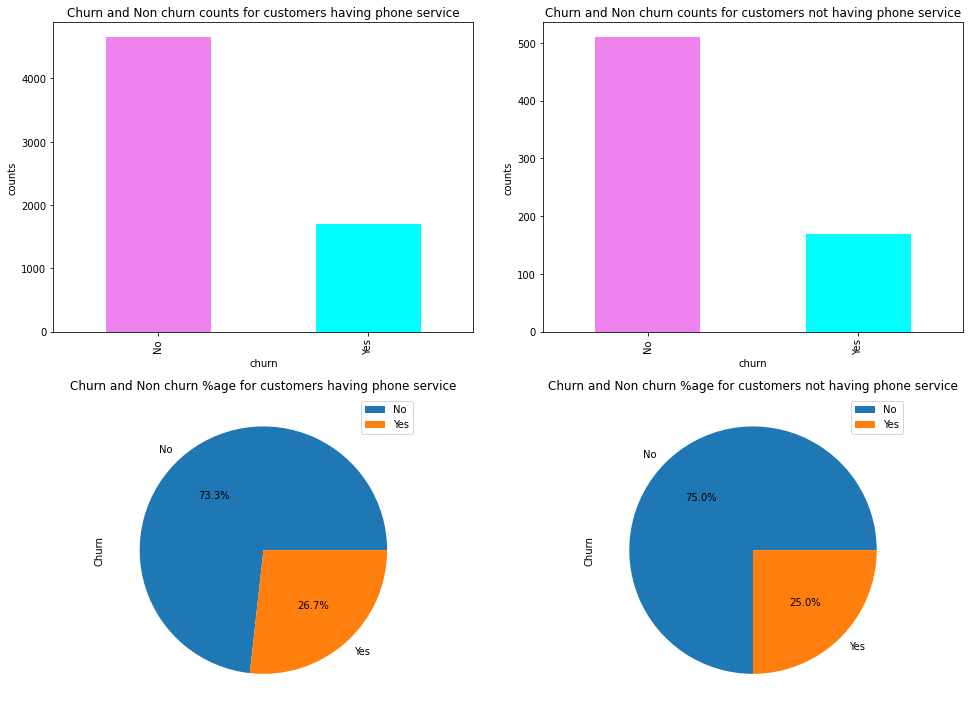

In [ ]:
 #checking for churn rate among cutomers who also have phone service along with internet service
counts_phnsrvice = dataset[dataset['PhoneService']=="Yes"]['Churn'].value_counts().sort_index() 
counts_nophnsrvice = dataset[dataset['PhoneService']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_phnsrvice.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers having phone service')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_nophnsrvice.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for customers not having phone service')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_phnsrvice.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for customers having phone service')
counts_nophnsrvice.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers not having phone service')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*Phone service doesnt seems to be have any effect on churn rate*

# ***Online Security***

In [ ]:
#checking for unique values and counts for feature
dataset['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

*Although we have 3 different values we'll only look for 2 (yes or no) because we want to analyse when user have an opportunity to opt for online security what was the churn rate among those who choose online security and who didn't. And also feature No internet service will be covered or investigated later under Internet services features.*

*Note - Same is true for upcoming 3 or 4 features*

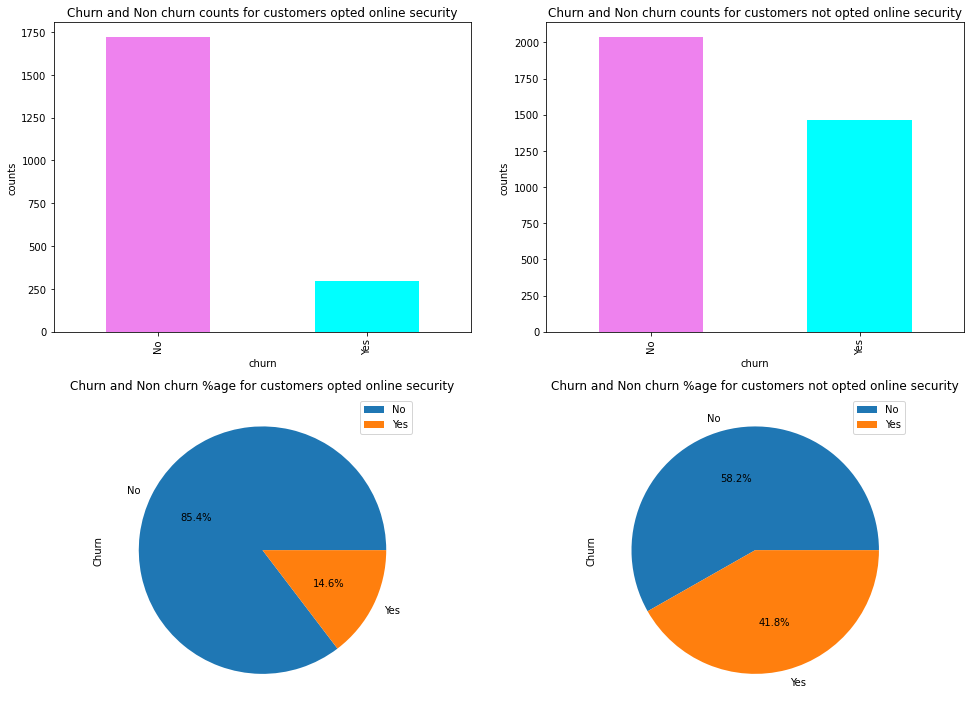

In [ ]:
 #checking for churn rate among cutomers who have opted for online services and one who haven't
counts_sec_yes = dataset[dataset['OnlineSecurity']=="Yes"]['Churn'].value_counts().sort_index() 
counts_sec_no = dataset[dataset['OnlineSecurity']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_sec_yes.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers opted online security')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_sec_no.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for customers not opted online security')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_sec_yes.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for customers opted online security')
counts_sec_no.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers not opted online security')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*Customers who haven't opted for online security has bit higher possibility of churn as compare to one who have opted*

# ***Online Backup***

In [ ]:
#checking for unique values and counts for feature
dataset['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

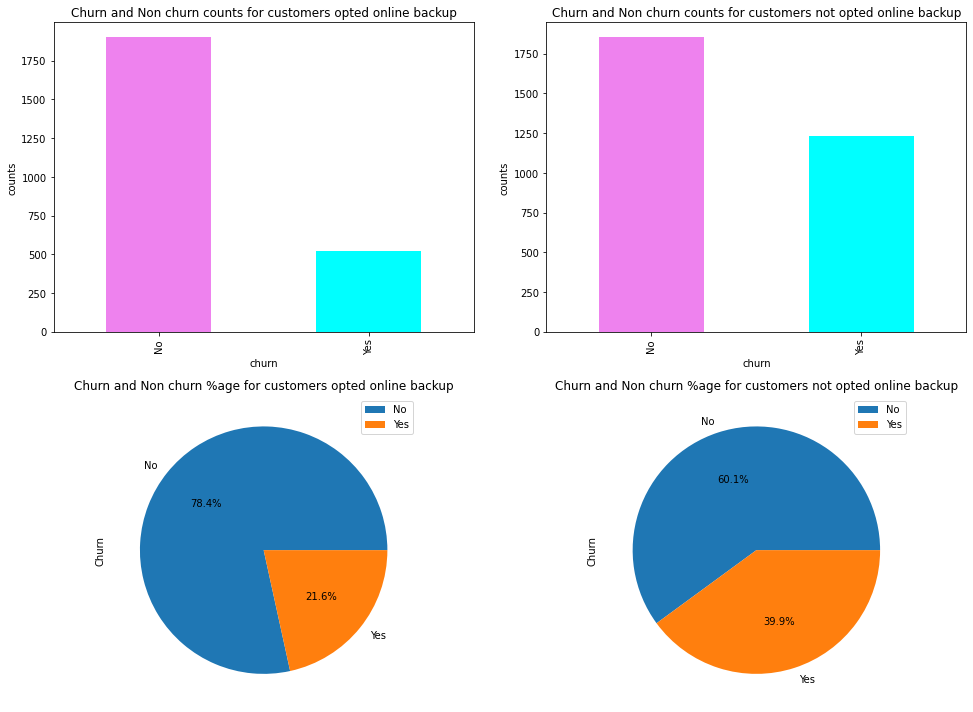

In [ ]:
#checking for churn rate among cutomers who have opted for online backup and one who haven't
counts_bkup_yes = dataset[dataset['OnlineBackup']=="Yes"]['Churn'].value_counts().sort_index() 
counts_bkup_no = dataset[dataset['OnlineBackup']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_bkup_yes.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers opted online backup')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_bkup_no.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for customers not opted online backup')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_bkup_yes.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for customers opted online backup')
counts_bkup_no.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers not opted online backup')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*Customers who haven't opted for online backup has slightly higher possibility of churn as compare to one who have opted*

# ***Device Protection***

In [ ]:
#checking for unique values and counts for feature
dataset['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

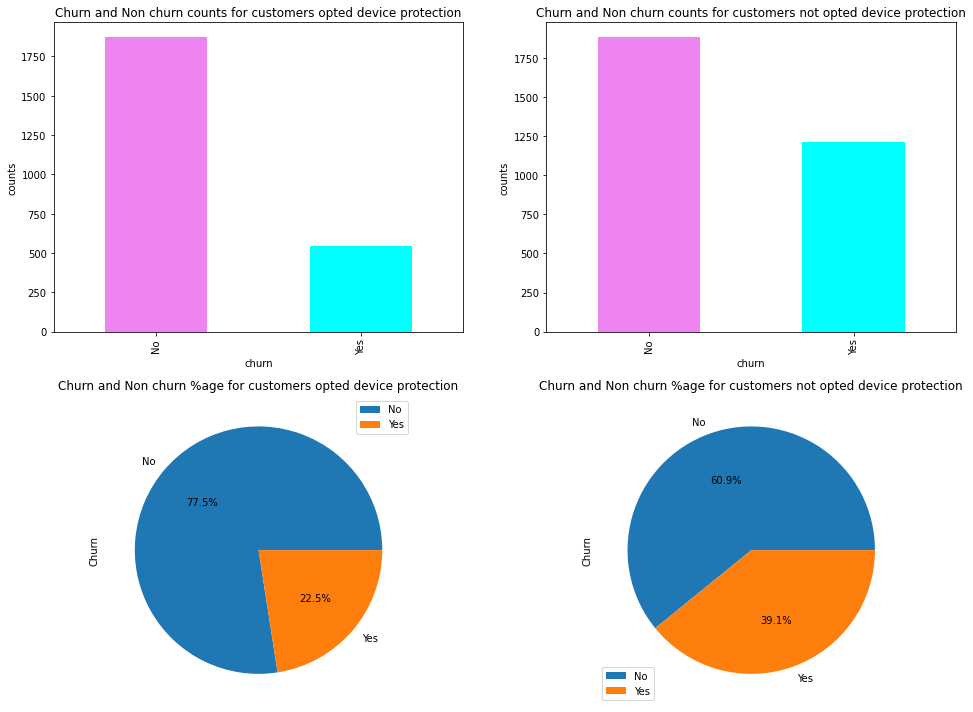

In [ ]:
 #checking for churn rate among cutomers who have opted for device protection and one who haven't
counts_dp_yes = dataset[dataset['DeviceProtection']=="Yes"]['Churn'].value_counts().sort_index() 
counts_dp_no = dataset[dataset['DeviceProtection']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_dp_yes.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers opted device protection')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_dp_no.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for customers not opted device protection')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_dp_yes.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for customers opted device protection')
counts_dp_no.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers not opted device protection')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*Customers who haven't opted for device protection has slightly higher possibility of churn as compare to one who have opted*

# ***Tech Support***

In [ ]:
#checking for unique values and counts for feature
dataset['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

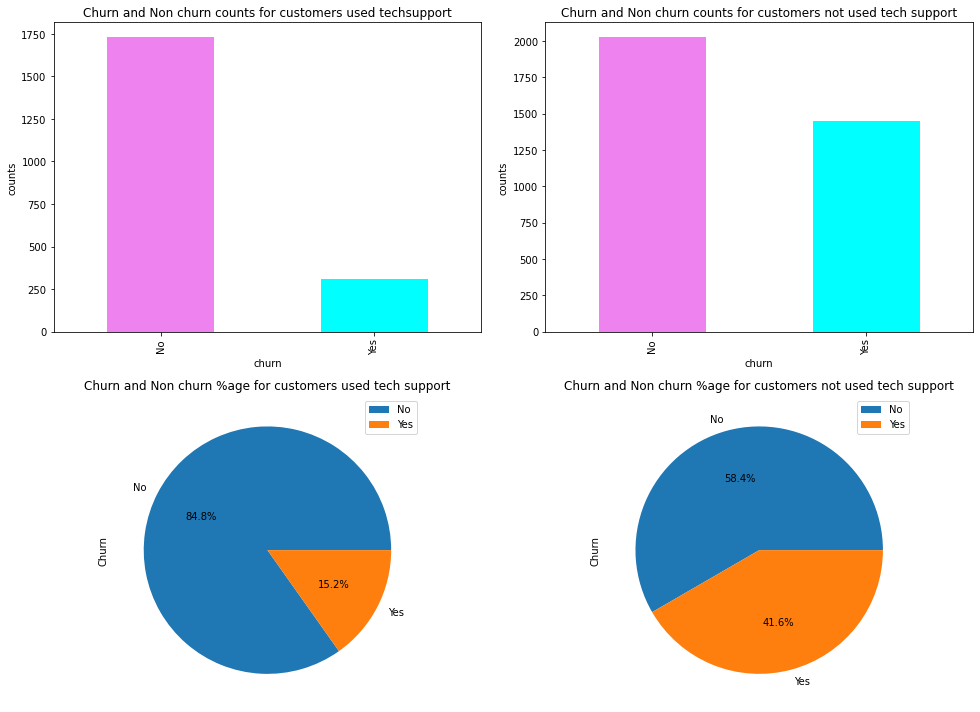

In [ ]:
 #checking for churn rate among cutomers who have use our tech support
counts_ts_yes = dataset[dataset['TechSupport']=="Yes"]['Churn'].value_counts().sort_index() 
counts_ts_no = dataset[dataset['TechSupport']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_ts_yes.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers used techsupport')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_ts_no.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for customers not used tech support')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_ts_yes.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for customers used tech support')
counts_ts_no.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers not used tech support')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*Customers who haven't opted tech support has comparitively higher churn rate than the ones who have reached*

# ***Streaming TV***

In [ ]:
#checking for unique values and counts for feature
dataset['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

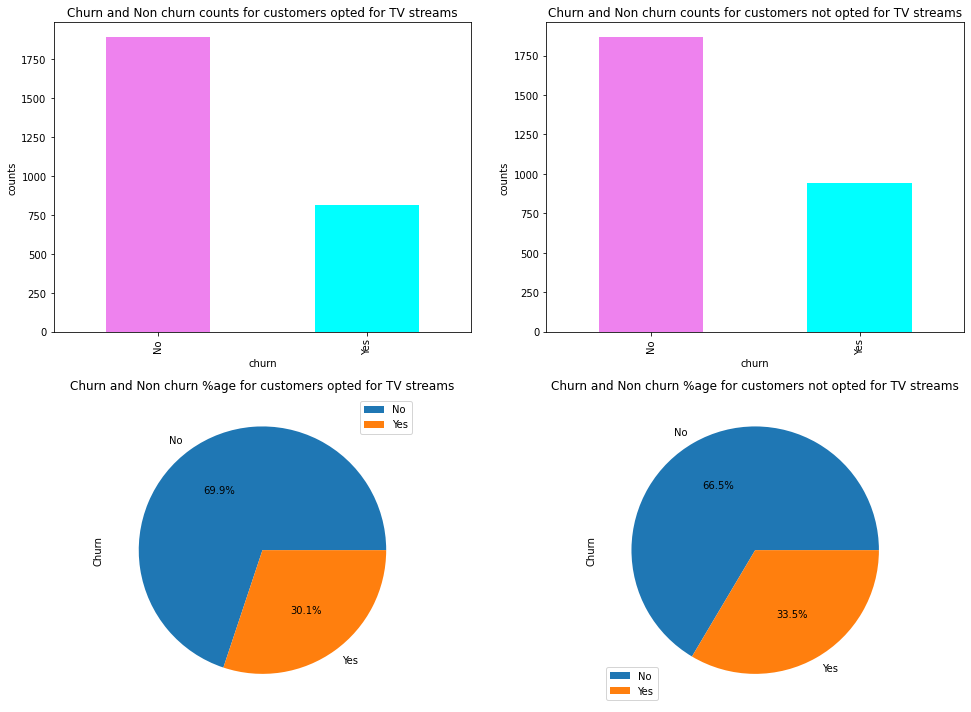

In [ ]:
 #checking for churn rate among cutomers who have opted TV streams on their network and who haven't
counts_stv_yes = dataset[dataset['StreamingTV']=="Yes"]['Churn'].value_counts().sort_index() 
counts_stv_no = dataset[dataset['StreamingTV']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_stv_yes.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers opted for TV streams')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_stv_no.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for customers not opted for TV streams')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_stv_yes.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for customers opted for TV streams')
counts_stv_no.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers not opted for TV streams')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*Their seems to be nearby no effect of TV streams on churn rate*

# ***Streaming Movies***

In [ ]:
#checking for unique values and counts for feature
dataset['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

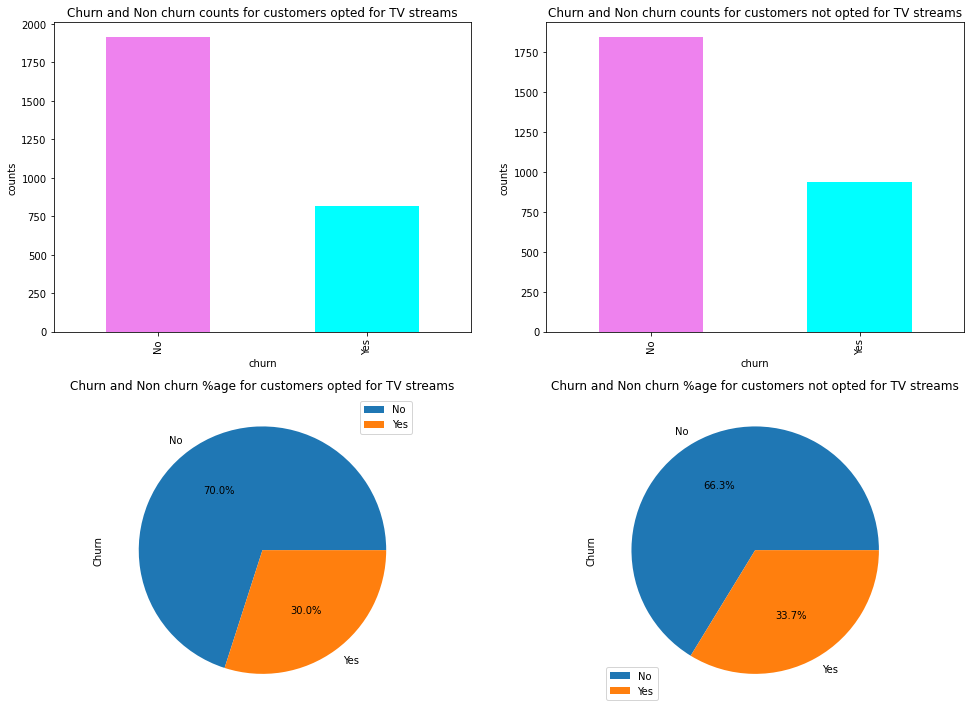

In [ ]:
 #checking for churn rate among cutomers who have opted movie streams on their network and who haven't
counts_stmovies_yes = dataset[dataset['StreamingMovies']=="Yes"]['Churn'].value_counts().sort_index() 
counts_stmovies_no = dataset[dataset['StreamingMovies']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_stmovies_yes.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers opted for TV streams')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_stmovies_no.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for customers not opted for TV streams')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_stmovies_yes.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for customers opted for TV streams')
counts_stmovies_no.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers not opted for TV streams')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*Their seems to be nearby no effect of movie streams as well on churn rate*

# ***Paperless Billing***

In [ ]:
#checking for unique values and counts for feature
dataset['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

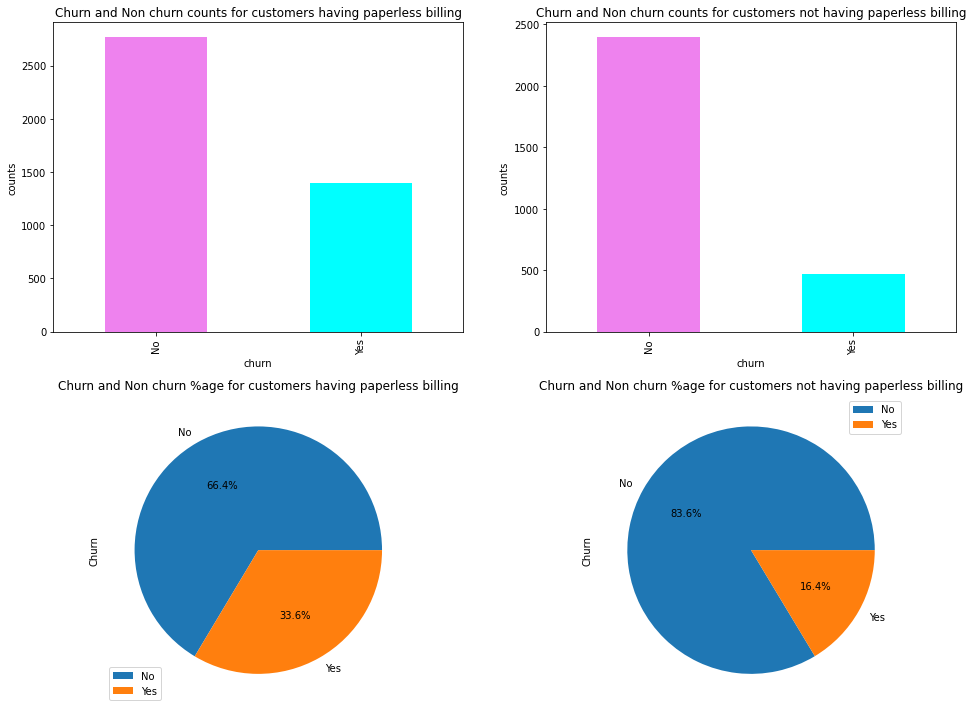

In [ ]:
 #checking for churn rate among cutomers who have chosen for paperless billing and who haven't
counts_plb_yes = dataset[dataset['PaperlessBilling']=="Yes"]['Churn'].value_counts().sort_index() 
counts_plb_no = dataset[dataset['PaperlessBilling']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_plb_yes.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers having paperless billing')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_plb_no.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for customers not having paperless billing')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_plb_yes.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for customers having paperless billing')
counts_plb_no.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers not having paperless billing')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*churn rate is higher in customers who have paperless billing as compare to one's who haven't*

*We are nearby done with binary visualuisations of data.We'll transorm it into 1's and 0's later to use by our model. Its time to dig out some information from numerical data.*

We can draw following conclusion from these ▶

1. Customer with internet services and opted for services like online backup, security, tech support or device protection has a less churn rate in general. So in order to reduce churn rate we should advertise or introduce some offers to attract customers to opt for such services.

2. We have seen one with dependents and partners are churning less. Introducing some better partner plans to attract couples might help us in less churning.

3. One with opted for phone service have a similar churn rate as one who haven't opted. Although churn rate is still nearby 25%. We should look for the improvements to decrease this further

# ***Numerical Features***

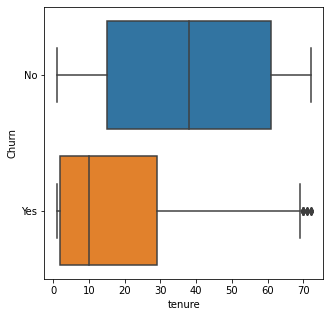

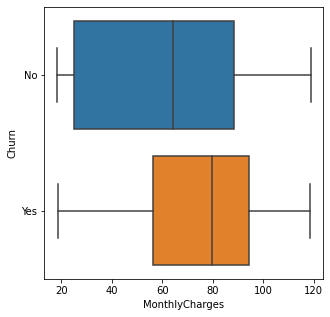

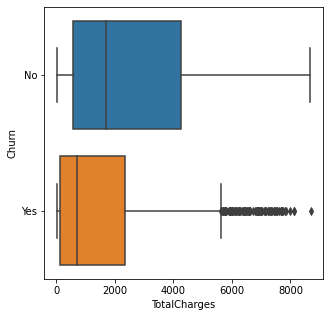

In [ ]:
#plotting a box plot to understand tenure relation with churn
for feature in dataset.describe().columns:
  if feature not in ['SeniorCitizen']:
    fig = plt.figure(figsize=(5,5))
    axs = fig.gca()
    sns.boxplot(x=feature, y='Churn', data = dataset, ax= axs)

***Conclusion***

1. *Median value of tenure for ones who have churned is less and also a complete range of tenure is relatively less than one who haven't churned. So we can also say churn rate is higher in recent/new customers as churned ones have less tenure*

2. *Somewhere monthly charges are higher for those who have churned as compare to ones who haven't churned and might be one of the prominent reason for churn* 

3. *If we see total charges for churned one is its coming out to be lesser than non churn ones but still customers who has churned has many outliers towards heavily charged and also when we have checked the tenure for churn ones is less that could be the reason of less total charges*  

*Note we can also apply the for loopf for above analysis to complete the code in single for loopbut it would be very mushy so i have gone one by one on each feature*

*And with this we are done with numerical  features as well. Now its time to look for mutltiple categorical variable* 

# ***Multiple Lines***

In [ ]:
dataset['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

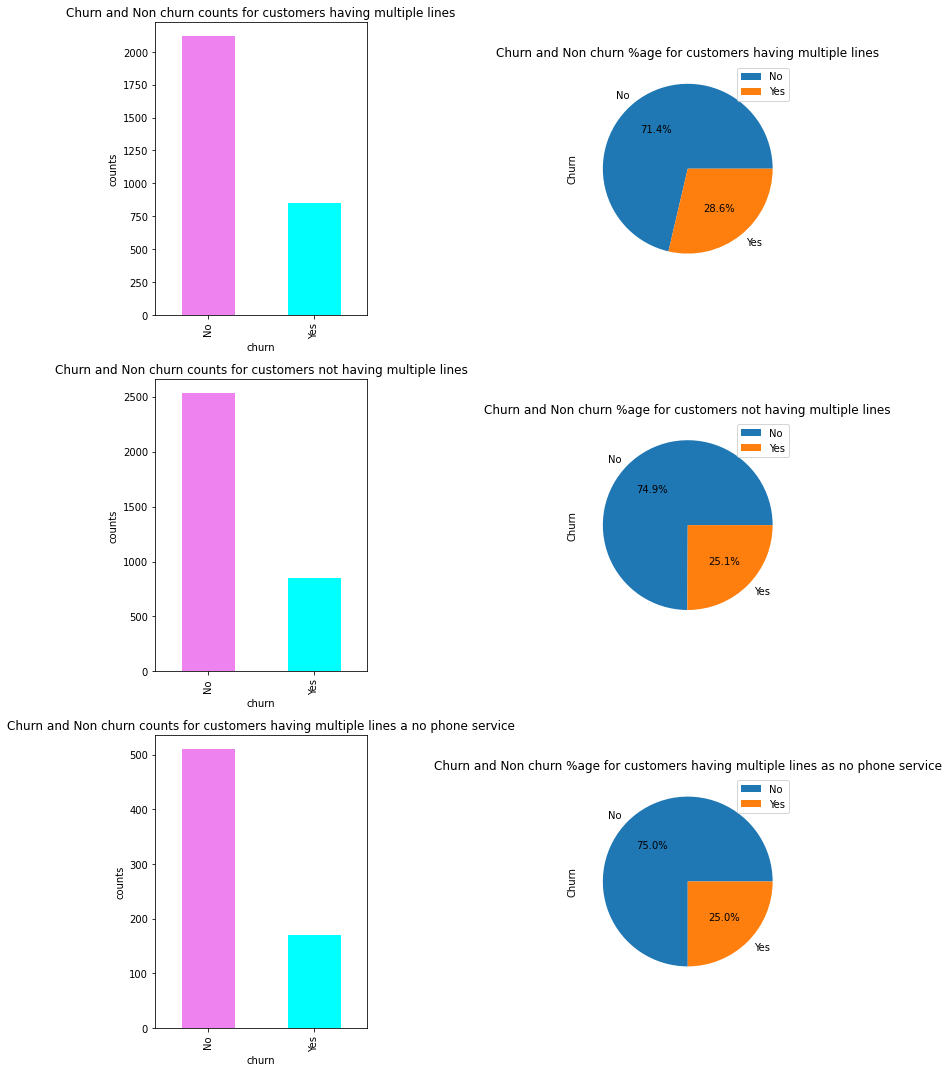

In [ ]:
 #checking for churn rate among multiple values for multiple lines
counts_mlines_yes = dataset[dataset['MultipleLines']=="Yes"]['Churn'].value_counts().sort_index() 
counts_mlines_no = dataset[dataset['MultipleLines']=="No"]['Churn'].value_counts().sort_index()
counts_mlines_nops = dataset[dataset['MultipleLines']=="No phone service"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(3,2, figsize=(12,15))
#barplots
counts_mlines_yes.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers having multiple lines')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_mlines_no.plot.bar(ax = ax[1,0],color=['violet', 'cyan'])
ax[1,0].set_title('Churn and Non churn counts for customers not having multiple lines')
ax[1,0].set(ylabel = 'counts', xlabel='churn')
counts_mlines_nops.plot.bar(ax = ax[2,0],color=['violet', 'cyan'])
ax[2,0].set_title('Churn and Non churn counts for customers having multiple lines a no phone service')
ax[2,0].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_mlines_yes.plot.pie(ax = ax[0,1], autopct = '%1.1f%%')
ax[0,1].set_title('Churn and Non churn %age for customers having multiple lines')
counts_mlines_no.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers not having multiple lines')
counts_mlines_nops.plot.pie(ax = ax[2,1],autopct = '%1.1f%%')
ax[2,1].set_title('Churn and Non churn %age for customers having multiple lines as no phone service')
ax[0,1].legend()
ax[1,1].legend()
ax[2,1].legend()
fig.tight_layout()

*Churn rate is almost similar for each of multiple lines value so we can say that it might not be hampering in increasing or decreasing churn rate*

# ***Internet Service***

In [ ]:
dataset['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

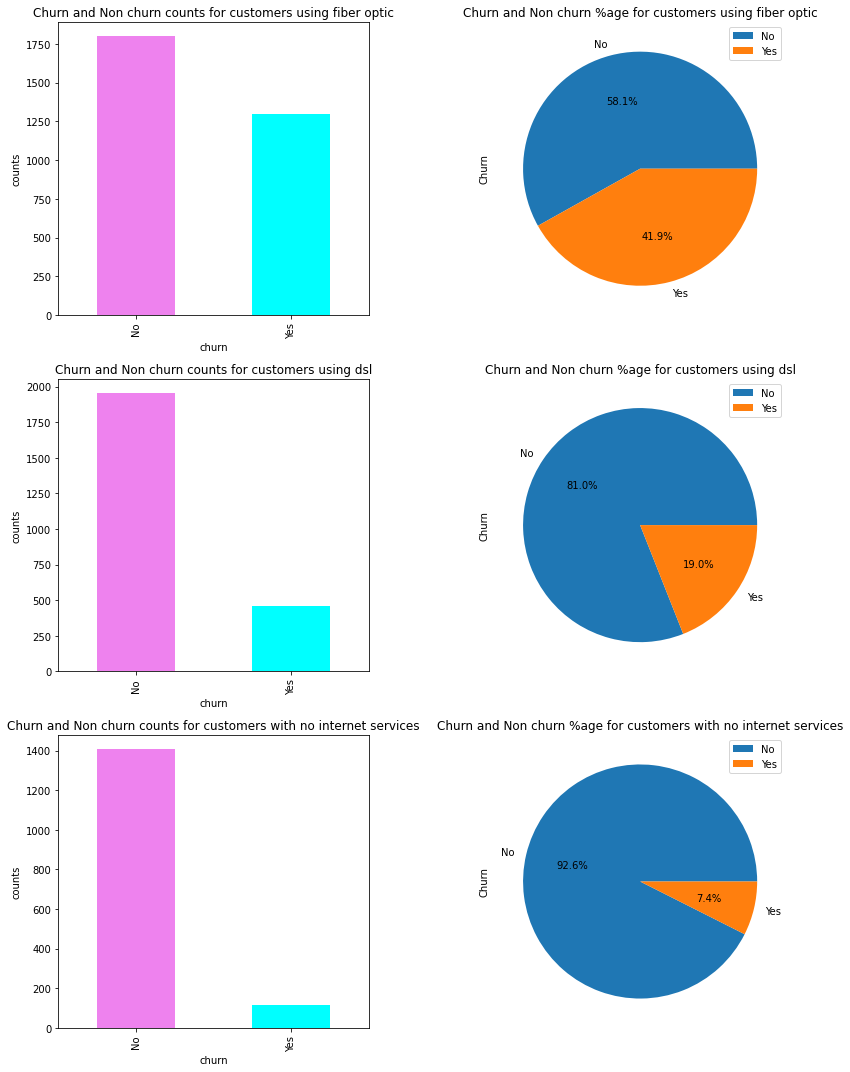

In [ ]:
 #checking for churn rate for different internet services
counts_fiberoptic = dataset[dataset['InternetService']=="Fiber optic"]['Churn'].value_counts().sort_index() 
counts_dsl = dataset[dataset['InternetService']=="DSL"]['Churn'].value_counts().sort_index()
counts_no = dataset[dataset['InternetService']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(3,2, figsize=(12,15))
#barplots
counts_fiberoptic.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers using fiber optic')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_dsl.plot.bar(ax = ax[1,0],color=['violet', 'cyan'])
ax[1,0].set_title('Churn and Non churn counts for customers using dsl')
ax[1,0].set(ylabel = 'counts', xlabel='churn')
counts_no.plot.bar(ax = ax[2,0],color=['violet', 'cyan'])
ax[2,0].set_title('Churn and Non churn counts for customers with no internet services')
ax[2,0].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_fiberoptic.plot.pie(ax = ax[0,1], autopct = '%1.1f%%')
ax[0,1].set_title('Churn and Non churn %age for customers using fiber optic')
counts_dsl.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers using dsl')
counts_no.plot.pie(ax = ax[2,1],autopct = '%1.1f%%')
ax[2,1].set_title('Churn and Non churn %age for customers with no internet services')
ax[0,1].legend()
ax[1,1].legend()
ax[2,1].legend()
fig.tight_layout()

*Churn rate is in decreasing order for fiber optic, dsl and no internet service. Customers who haven't opt for internet services has very low churn rate.*


# ***Contract***

In [ ]:
dataset['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

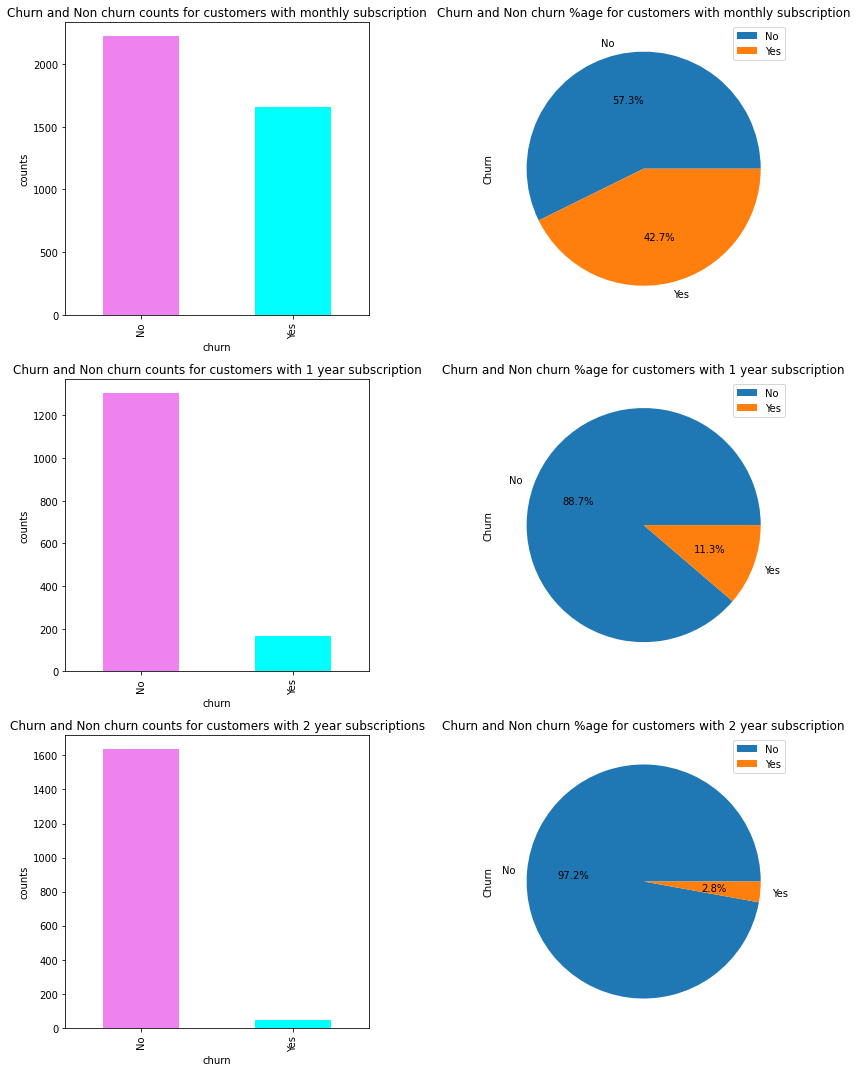

In [ ]:
 #checking for churn rate for different contract/subscriptions
counts_m2m = dataset[dataset['Contract']=="Month-to-month"]['Churn'].value_counts().sort_index() 
counts_1y = dataset[dataset['Contract']=="One year"]['Churn'].value_counts().sort_index()
counts_2y = dataset[dataset['Contract']=="Two year"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(3,2, figsize=(12,15))
#barplots
counts_m2m.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers with monthly subscription')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_1y.plot.bar(ax = ax[1,0],color=['violet', 'cyan'])
ax[1,0].set_title('Churn and Non churn counts for customers with 1 year subscription')
ax[1,0].set(ylabel = 'counts', xlabel='churn')
counts_2y.plot.bar(ax = ax[2,0],color=['violet', 'cyan'])
ax[2,0].set_title('Churn and Non churn counts for customers with 2 year subscriptions')
ax[2,0].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_m2m.plot.pie(ax = ax[0,1], autopct = '%1.1f%%')
ax[0,1].set_title('Churn and Non churn %age for customers with monthly subscription')
counts_1y.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers with 1 year subscription')
counts_2y.plot.pie(ax = ax[2,1],autopct = '%1.1f%%')
ax[2,1].set_title('Churn and Non churn %age for customers with 2 year subscription')
ax[0,1].legend()
ax[1,1].legend()
ax[2,1].legend()
fig.tight_layout()

*Churning rate is very high for monthly subscriber. reason for this might be that user has freedom to switch in month only*

# ***PaymentMethod***

In [ ]:
dataset['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

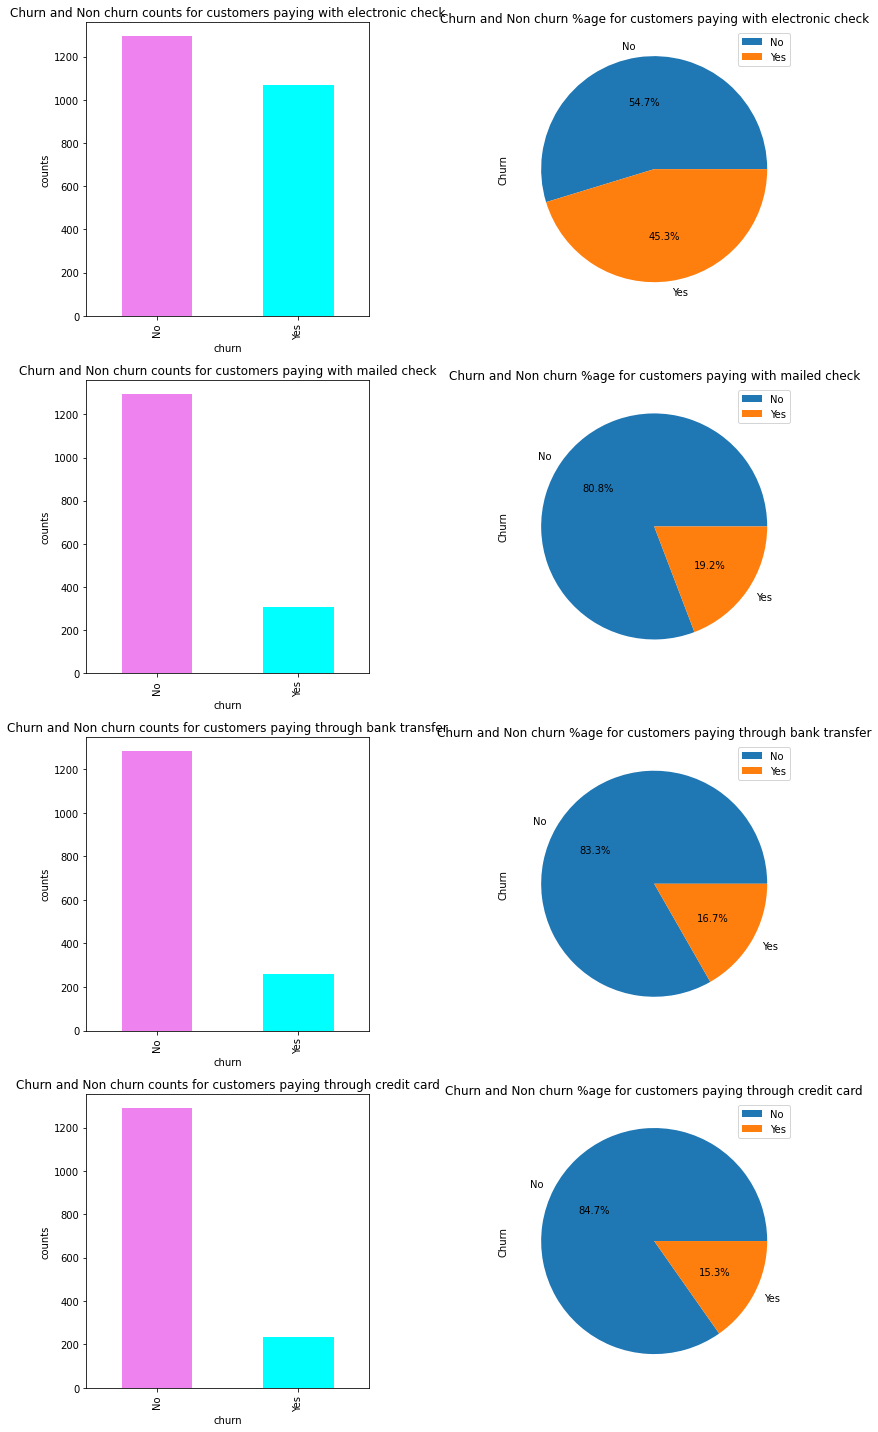

In [ ]:
 #checking for churn rate for different contract/subscriptions
counts_ec = dataset[dataset['PaymentMethod']=="Electronic check"]['Churn'].value_counts().sort_index() 
counts_mc = dataset[dataset['PaymentMethod']=="Mailed check"]['Churn'].value_counts().sort_index()
counts_bt = dataset[dataset['PaymentMethod']=="Bank transfer (automatic)"]['Churn'].value_counts().sort_index()
counts_cc = dataset[dataset['PaymentMethod']=="Credit card (automatic)"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(4,2, figsize=(12,20))
#barplots
counts_ec.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers paying with electronic check')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_mc.plot.bar(ax = ax[1,0],color=['violet', 'cyan'])
ax[1,0].set_title('Churn and Non churn counts for customers paying with mailed check')
ax[1,0].set(ylabel = 'counts', xlabel='churn')
counts_bt.plot.bar(ax = ax[2,0],color=['violet', 'cyan'])
ax[2,0].set_title('Churn and Non churn counts for customers paying through bank transfer')
ax[2,0].set(ylabel = 'counts', xlabel='churn')
counts_cc.plot.bar(ax = ax[3,0],color=['violet', 'cyan'])
ax[3,0].set_title('Churn and Non churn counts for customers paying through credit card')
ax[3,0].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_ec.plot.pie(ax = ax[0,1], autopct = '%1.1f%%')
ax[0,1].set_title('Churn and Non churn %age for customers paying with electronic check')
counts_mc.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers paying with mailed check')
counts_bt.plot.pie(ax = ax[2,1],autopct = '%1.1f%%')
ax[2,1].set_title('Churn and Non churn %age for customers paying through bank transfer')
counts_cc.plot.pie(ax = ax[3,1],autopct = '%1.1f%%')
ax[3,1].set_title('Churn and Non churn %age for customers paying through credit card')
ax[0,1].legend()
ax[1,1].legend()
ax[2,1].legend()
ax[3,1].legend()
fig.tight_layout()

*Churn rate is in decreasing order for (Electronic check, mailed check, bank transfer and credit card)*

So we are done with visualising relation of our dependent variable with in dependent variable and conclusions of visualization has been drawn  


*We are builiding logistic regression here so now we'll look for the assumptions and also pre process the data like one hot encoding, removing multicollinearity,etc*

*We'll create a copy of dataset so that we don't have to make changes in our orignal data.*

In [ ]:
dataset_cpy = dataset.copy()

In [ ]:
binary_features = [feature for feature in dataset_cpy.columns if dataset_cpy[feature].nunique()==2]
binary_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

*Here except gender every feature either has yes or no so we'll map them into 1s and 0s in one go*

In [ ]:
for feature in binary_features:
  if feature not in ['gender', 'SeniorCitizen']:
    dataset_cpy[feature]= dataset_cpy[feature].map({'Yes':1, 'No':0})

In [ ]:
# mapping gender into 1's and 0's
dataset_cpy['gender'] = dataset_cpy['gender'].map({'Male':1, 'Female':0})

In [ ]:
# visualise the changes through table
dataset_cpy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


*Now we'll do the same for multiple categorical variable*

In [ ]:
# creating a list of multiple categorical features
cat_features = list(set(list(dataset_cpy.columns)) - set(list(dataset_cpy.describe().columns)))
cat_features

['StreamingMovies',
 'MultipleLines',
 'OnlineBackup',
 'InternetService',
 'TechSupport',
 'StreamingTV',
 'customerID',
 'Contract',
 'PaymentMethod',
 'DeviceProtection',
 'OnlineSecurity']

In [ ]:
#customer id is of no use to us in analysis as it is just a =unique identifier to each customer
cat_features.remove('customerID')

In [ ]:
#we are dropping one created columns from each categorical encoding - reason for it is to avoid dummy variable trap
#you can learn what dummy variable trap.
#Now from our past analysis i know there is no intrernet service as one feature in our data as third category
#so if a feature has no internet service as a category i am dropping that or else first created column 
for feature in cat_features:
  if 'No internet service' in list(dataset_cpy[feature].unique()):
    dummies = pd.get_dummies(dataset_cpy[feature],prefix = feature)
    dummies.drop(feature + '_' + 'No internet service', axis =1, inplace=True)
    dataset_cpy = pd.concat([dataset_cpy, dummies], axis =1)
  else:
    dummies = pd.get_dummies(dataset_cpy[feature], prefix = feature, drop_first = True)
    dataset_cpy = pd.concat([dataset_cpy, dummies], axis =1)  

In [ ]:
dataset_cpy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_Yes
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0


*Now we'll drop customerID and orignal multiple category feature as one hot encoded data is their for those features*

In [ ]:
dataset_cpy.drop(cat_features, inplace = True, axis =1)
dataset_cpy.drop('customerID', inplace = True, axis =1)

*Need to standardise our numerical features*

In [ ]:
scale = StandardScaler()
dataset_cpy[['MonthlyCharges','TotalCharges','tenure']] = scale.fit_transform(dataset_cpy[['MonthlyCharges','TotalCharges','tenure']])

In [ ]:
dataset_cpy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_Yes
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0


*Now we are done with complete preprocessing and transformation of data for model. Time to split the data.*

In [ ]:
#Splitting the data into X and Y(independent and dependent variable)
x= dataset_cpy[[feature for feature in dataset_cpy.columns if feature not in ['Churn']]]
y = dataset_cpy['Churn']

*Checking for multicollinearity and removing it*

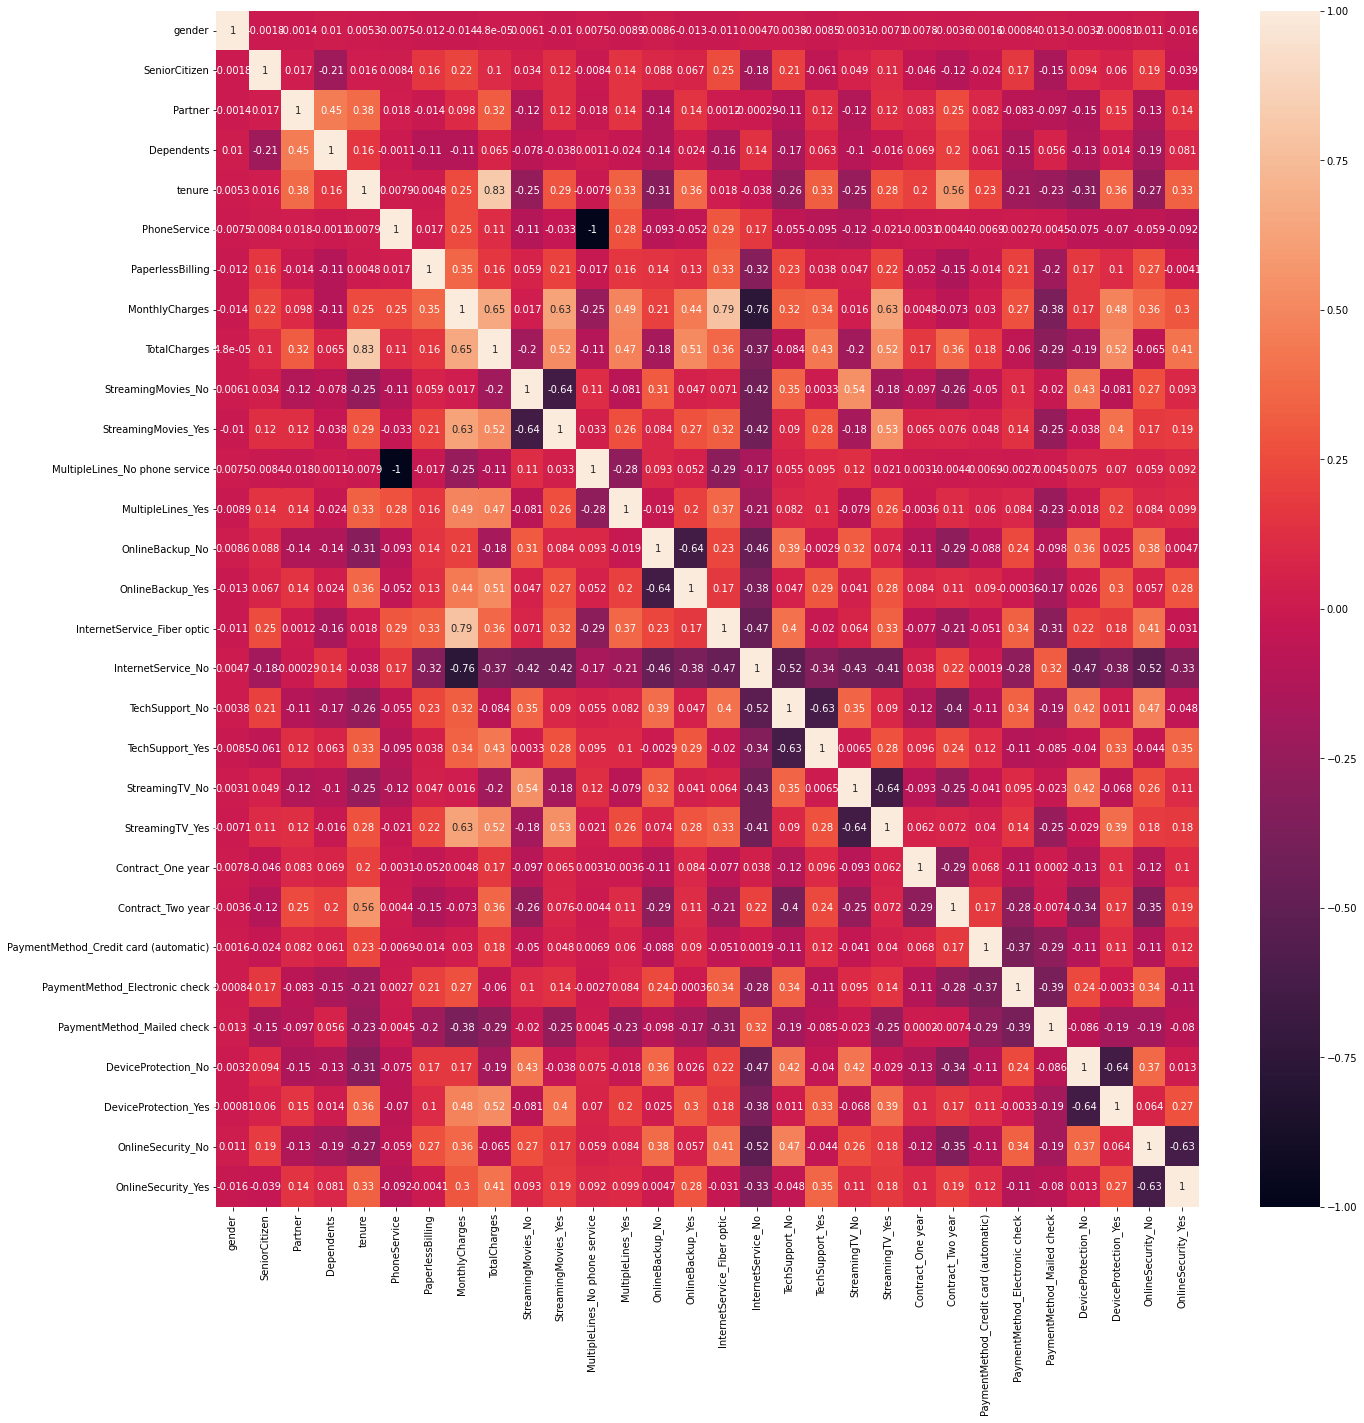

In [ ]:
plt.figure(figsize=(22,22))
corr = x.corr()
sns.heatmap(corr,annot=True)

In [ ]:
x.drop(['OnlineBackup_No','OnlineSecurity_No','TechSupport_No', 'StreamingTV_No',
              'MultipleLines_No phone service', 'StreamingMovies_No','InternetService_No'], inplace =True, axis =1)

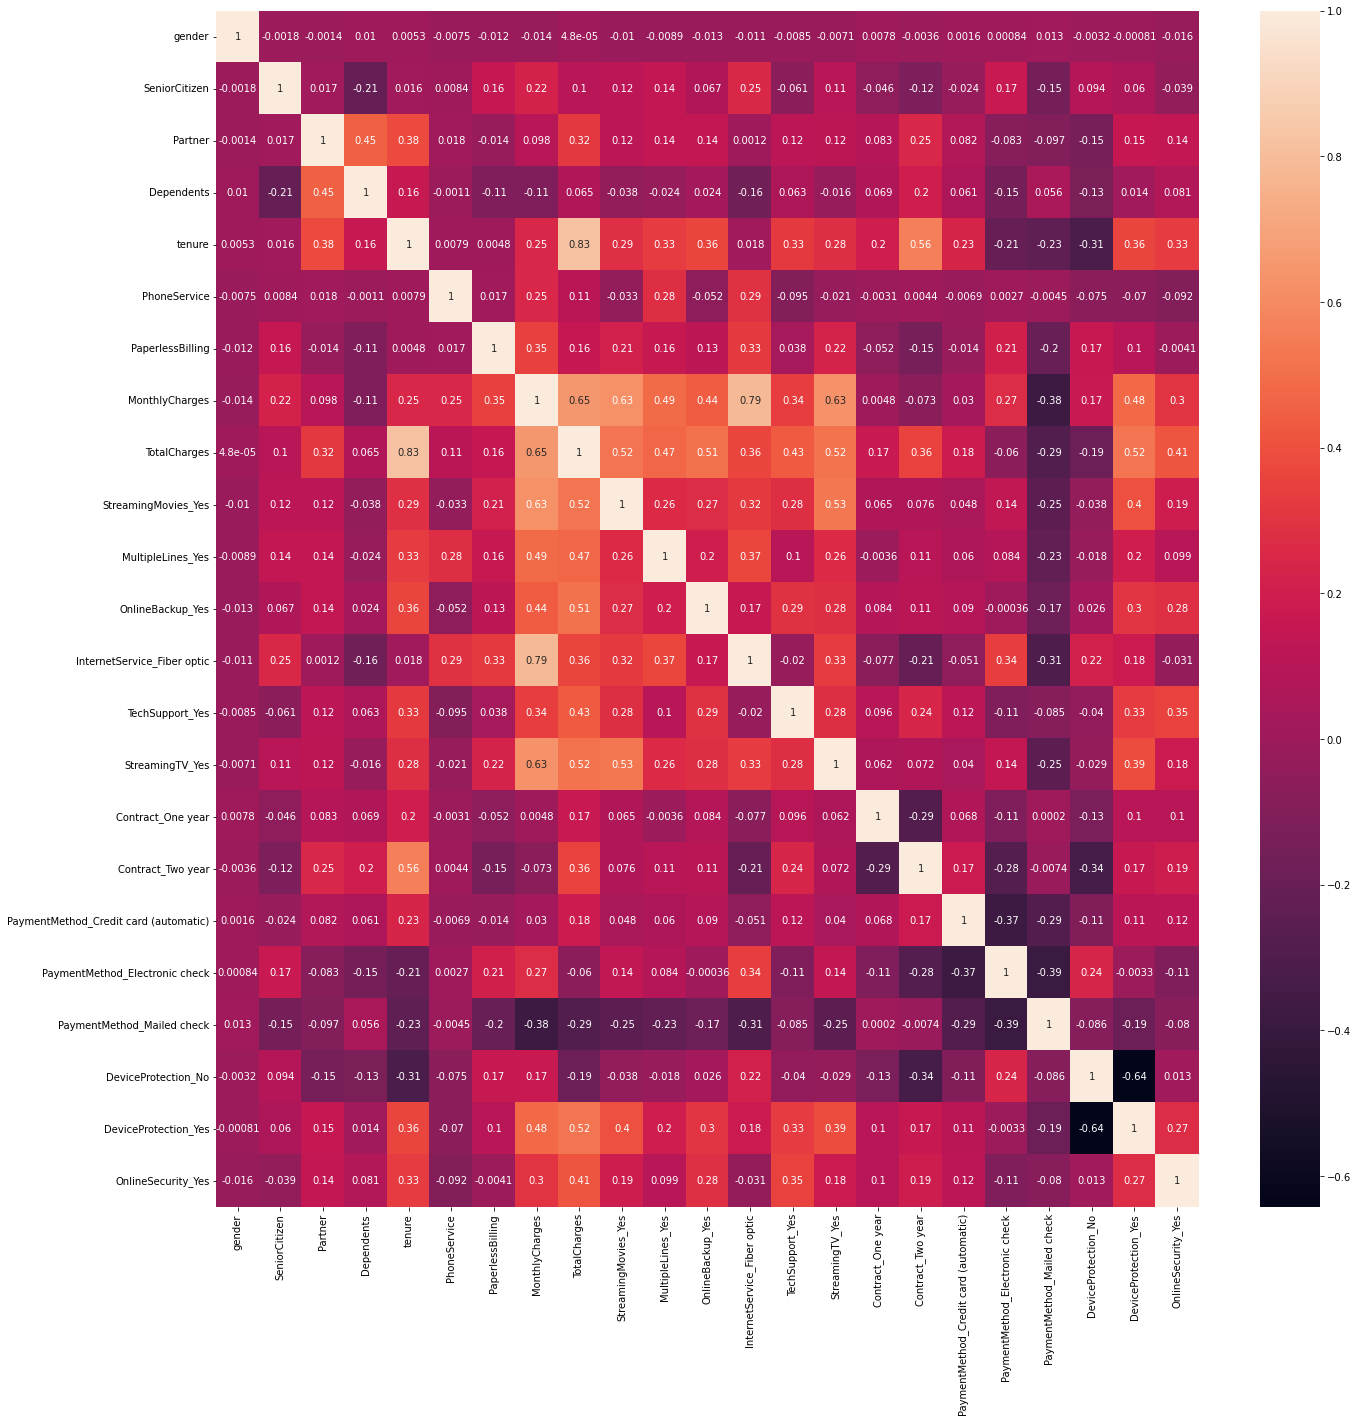

In [ ]:
plt.figure(figsize=(22,22))
corr = x.corr()
sns.heatmap(corr,annot=True)

In [ ]:
x.drop('TotalCharges',inplace=True, axis = 1)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x): 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = x.columns
   vif["VIF"] = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])] 
   return(vif)

In [ ]:
calc_vif(x)

,variables,VIF
0,gender,2.021250
1,SeniorCitizen,1.376582
2,Partner,2.826604
3,Dependents,1.968153
4,tenure,2.827130
5,PhoneService,8.434913
6,PaperlessBilling,2.966977
7,MonthlyCharges,6.623392
8,StreamingMovies_Yes,2.950517
9,MultipleLines_Yes,2.591019


*Stratified train test split with test size of 20 percent*

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=20, stratify=y)

In [ ]:
#model building and fitting training data 
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#predicting training values and test values
y_train_pred= logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

[[930 103]
 [164 210]]


Text(33.0, 0.5, 'True')

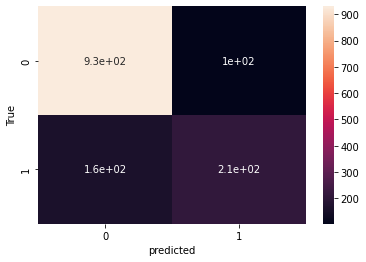

In [ ]:
conf_mtrx = confusion_matrix(y_test,y_test_pred)
print(conf_mtrx)
sns.heatmap(conf_mtrx, annot = True)
plt.xlabel('predicted')
plt.ylabel('True')

*FPR - Out of total actual negatives which has been falsely declared as positives by our model*

*FNR - Out of total actual positives which has been falsely declared as negatives by our model*


FPR = 100/1030 = 0.097

FNR = 160/370 = 0.43

*Here FPR is fine but FNR is high*

*Now whether FPR is important or FNR it depends on bussiness requirements.*

*Lets consider a case here company will offer a voucher of 100 rupees if our model predicts that a customer will churn. Now in this case even if a customer is not about to churn and our model predicts that it will churn. It will not a much of loss to a company distributing some extra voucher but if our model predicts a customers to be non churn that actually gonna churn will be a issue. Here FNR is important and we need to minimize it*

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4130
           1       0.65      0.54      0.59      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.79      0.80      0.79      5625



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.67      0.56      0.61       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



*from above report we can see model is performing far better to predict the customers that are not churn than to customers that are churn.We'll try to look for ROC curve now and try to find best threshold*

In [ ]:
#y_pred_proba - storing the probabilty of being in class 1(churned) in y_pred_proba
y_pred_proba = logreg.predict_proba(x_test)[: :,1]

In [ ]:
#roc_curve will tell you fpr, tpr for different threshold values and with these threshold values we'll try to find the best
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

In [ ]:
#auc_score 
roc_auc = auc(fpr,tpr)
#calculate the difference between tpr and fpr and try selecting the one with max positive value
diff = tpr-fpr
#checking for index with max diff
indx = np.argmax(diff)
opt_threshold = threshold[indx]
print('Optimum threshold : ', opt_threshold ) 

Optimum threshold :  0.26397170436854106


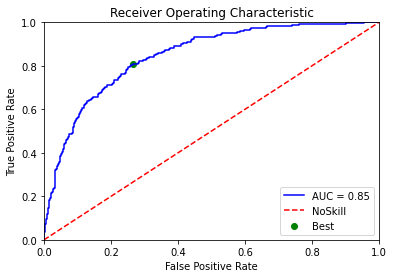

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.scatter(fpr[indx],tpr[indx],marker='o',color='green',label= 'Best')
plt.plot([0, 1], [0, 1],'r--',label='NoSkill')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#now we'll try with our new threshold and see how our model is performing now 
prednew = np.where(logreg.predict_proba(x_test)[:,1] > opt_threshold, 1, 0)

[[760 273]
 [ 72 302]]


Text(33.0, 0.5, 'True')

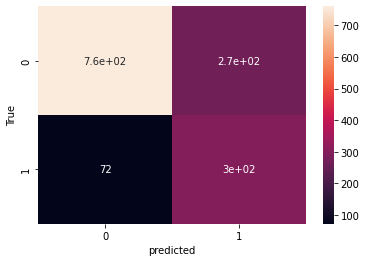

In [ ]:
conf_mtrx1 = confusion_matrix(y_test,prednew)
print(conf_mtrx1)
sns.heatmap(conf_mtrx1, annot = True)
plt.xlabel('predicted')
plt.ylabel('True')

FPR = 270/1030 = 0.26

FNR = 72/372 =  0.19

*So here now on the cost of FPR we have improved our FNR which is of much importance to us*

In [ ]:
print(classification_report(y_test, prednew))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1033
           1       0.53      0.81      0.64       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.75      0.77      1407



*We have improved the sensitivity of our model now for class 1*

*Now all these alteration depends on business requirement*

*1 Whether Class 0 is of much importance or class 1.*

*2.If precision is of much requirement recall for that specific class*

 of much importance. In our case here our model is predicting well for class 0 i.e the model is well in predicting the customers who are retained but not performing that quite good for churned customer. Even after havinvg threshold recall has been tradeoff between class.*